<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/2D_ve_3D_G%C3%B6r%C3%BCnt%C3%BC_%C4%B0%C5%9Fleme_ile_Montaj_Do%C4%9Frulu%C4%9Fu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2D ve 3D G√∂r√ºnt√º ƒ∞≈üleme ile Montaj Doƒüruluƒüu
‚Ä¢	Proje √ñnerisi: 2D veya 3D g√∂r√ºnt√º i≈üleme teknolojileri kullanarak par√ßa algƒ±lama ve montaj doƒüruluƒüunu artƒ±rma. √ñrneƒüin, bir montaj hattƒ±nda par√ßalarƒ±n doƒüru pozisyonlandƒ±rƒ±lmasƒ±nƒ± saƒülayan bir sistem geli≈ütirmek.
‚Ä¢	Beklenen √áƒ±ktƒ±: Montaj hatalarƒ±nda azalma, √ºretim hƒ±zƒ±nda artƒ±≈ü ve kalite kontrol s√ºre√ßlerinin iyile≈ütirilmesi.


1. Adƒ±m: Sentetik Veri Olu≈üturma
A≈üaƒüƒ±daki kod, beyaz bir zemin √ºzerinde rastgele daireler (par√ßalar) ve bir hedef ≈üablon olu≈üturur:

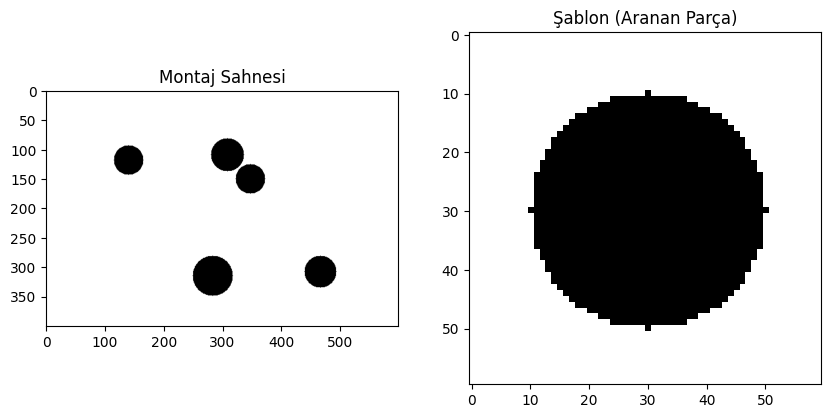

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Bo≈ü bir g√∂r√ºnt√º (beyaz zemin) olu≈ütur
img = np.ones((400, 600), dtype=np.uint8) * 255  # 400x600 piksel

# 2. Rastgele daireler (montaj par√ßalarƒ±) ekle
for _ in range(5):
    center = (np.random.randint(100, 500), np.random.randint(100, 500))
    radius = np.random.randint(20, 40)
    cv2.circle(img, center, radius, 0, -1)  # Siyah daireler

# 3. ≈ûablon olarak k√º√ß√ºk bir daire olu≈ütur (montajƒ± kontrol edilecek par√ßa)
template = np.ones((60, 60), dtype=np.uint8) * 255
cv2.circle(template, (30, 30), 20, 0, -1)  # 20px yarƒ±√ßaplƒ± daire

# G√∂rselle≈ütirme
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title("Montaj Sahnesi")
plt.subplot(122), plt.imshow(template, cmap='gray'), plt.title("≈ûablon (Aranan Par√ßa)")
plt.show()

2. Adƒ±m: ≈ûablon E≈üleme ile Montaj Kontrol√º


‚ùå HATA: Par√ßa bulunamadƒ±!


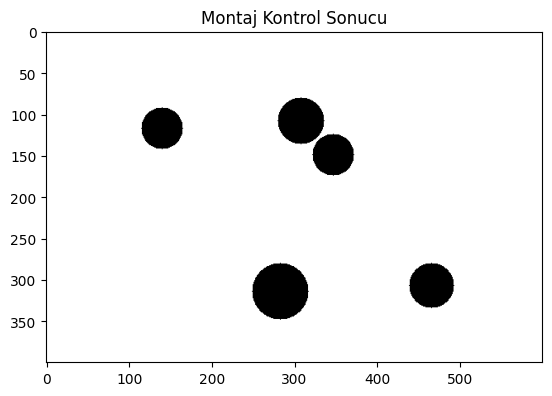

In [ ]:
# ≈ûablon e≈üleme yap
result = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# E≈üik deƒüeri belirle (√∂rneƒüin %80 e≈üle≈üme)
threshold = 0.8
if max_val >= threshold:
    print("‚úÖ Montaj Doƒüru! Par√ßa bulundu.")
    # E≈üle≈üen b√∂lgeyi i≈üaretle
    h, w = template.shape
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img, top_left, bottom_right, 0, 2)  # Siyah dikd√∂rtgen √ßiz
else:
    print("‚ùå HATA: Par√ßa bulunamadƒ±!")

# Sonucu g√∂ster
plt.imshow(img, cmap='gray')
plt.title("Montaj Kontrol Sonucu")
plt.show()

3. Adƒ±m: Senaryoyu Geni≈ületme (Opsiyonel)
Ger√ßek Zamanlƒ± Sim√ºlasyon: Kamera yerine webcam kullanmak i√ßin:

In [ ]:
cap = cv2.VideoCapture(0)  # Webcam'den canlƒ± g√∂r√ºnt√º al

1. Adƒ±m: 3D Derinlik Haritasƒ± Olu≈üturma


3D Sim√ºlasyon: Numpy ile rastgele derinlik haritasƒ± olu≈üturabiliriz.

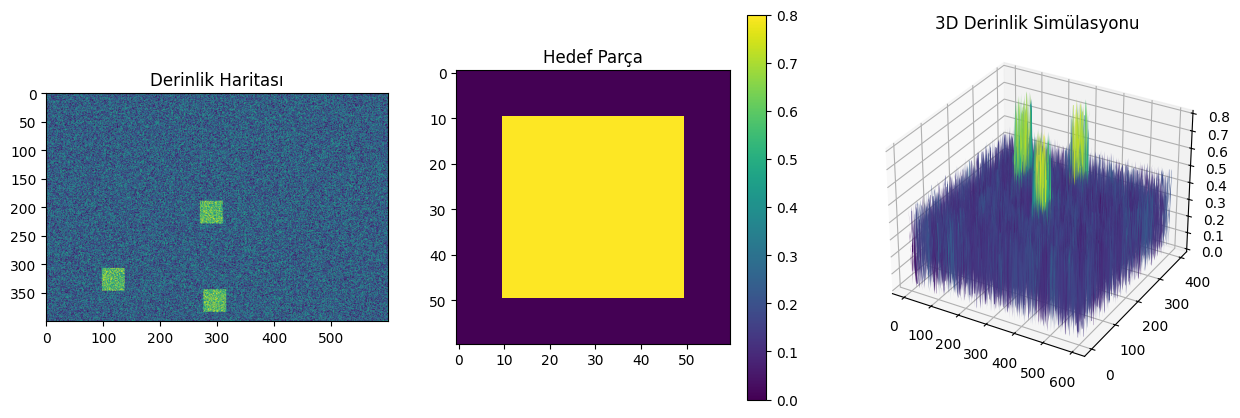

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Rastgele derinlik haritasƒ± (400x600 piksel, 0-1 arasƒ± deƒüerler)
depth_map = np.random.rand(400, 600) * 0.5  # Temel zemin (0.5 derinlik)

# 2. Montajlanacak par√ßalarƒ± sim√ºle et (belirli b√∂lgelerde derinlik artƒ±≈üƒ±)
for _ in range(3):
    x, y = np.random.randint(100, 500), np.random.randint(100, 500)
    depth_map[x-20:x+20, y-20:y+20] += 0.3  # Par√ßa b√∂lgesi (0.8 derinlik)

# 3. Hedef par√ßayƒ± olu≈ütur (doƒüru montaj i√ßin referans)
target_piece = np.zeros((60, 60))
target_piece[10:50, 10:50] = 0.8  # Merkezde kare ≈üeklinde par√ßa

# G√∂rselle≈ütirme
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(depth_map, cmap='viridis'), plt.title("Derinlik Haritasƒ±")
plt.subplot(132), plt.imshow(target_piece, cmap='viridis'), plt.title("Hedef Par√ßa")
plt.colorbar()

# 3D Y√ºzey Grafiƒüi
ax = plt.subplot(133, projection='3d')
X, Y = np.meshgrid(np.arange(depth_map.shape[1]), np.arange(depth_map.shape[0]))
ax.plot_surface(X, Y, depth_map, cmap='viridis')
ax.set_title("3D Derinlik Sim√ºlasyonu")
plt.show()

2. Adƒ±m: 3D Montaj Doƒürulama


‚úÖ 3D Montaj Doƒürulandƒ±! Par√ßa konumu: (266, 334)


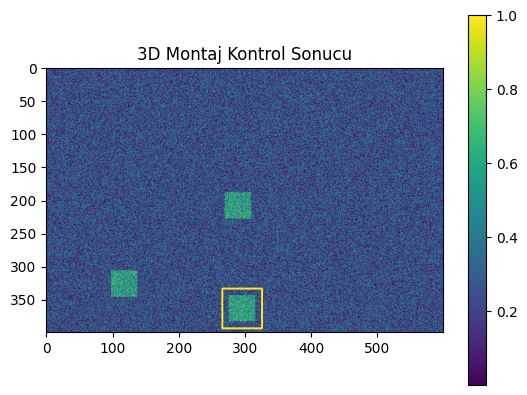

In [ ]:
# 1. Hedef par√ßayƒ± derinlik haritasƒ±nda ara
result = cv2.matchTemplate(depth_map.astype(np.float32), target_piece.astype(np.float32), cv2.TM_CCOEFF_NORMED)

# 2. E≈üik deƒüeri ile kontrol
threshold = 0.7
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

if max_val >= threshold:
    print("‚úÖ 3D Montaj Doƒürulandƒ±! Par√ßa konumu:", max_loc)
    # E≈üle≈üen b√∂lgeyi i≈üaretle
    h, w = target_piece.shape
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(depth_map, top_left, bottom_right, 1.0, 2)  # Beyaz dikd√∂rtgen
else:
    print("‚ùå HATA: Par√ßa 3D konumda bulunamadƒ±!")

# Sonucu g√∂ster
plt.imshow(depth_map, cmap='viridis')
plt.title("3D Montaj Kontrol Sonucu")
plt.colorbar()
plt.show()

3. Adƒ±m: Ger√ßek√ßi Senaryo i√ßin Geli≈ütirmeler
A. G√ºr√ºlt√º Ekleyerek Sim√ºlasyonu Ger√ßek√ßile≈ütirme

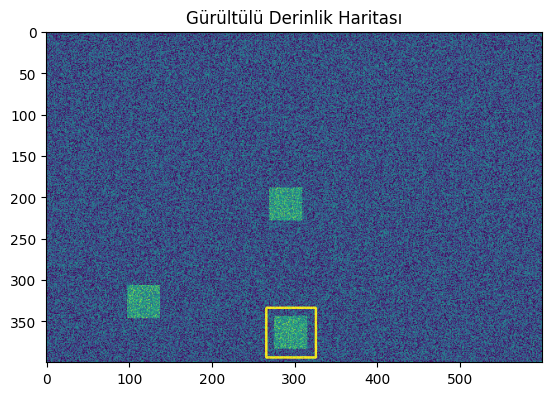

In [ ]:
# Gaussian g√ºr√ºlt√ºs√º ekle
noise = np.random.normal(0, 0.05, depth_map.shape)
depth_map_noisy = np.clip(depth_map + noise, 0, 1)

plt.imshow(depth_map_noisy, cmap='viridis')
plt.title("G√ºr√ºlt√ºl√º Derinlik Haritasƒ±")
plt.show()

B. √áoklu Par√ßa Kontrol√º


In [ ]:
# T√ºm e≈üle≈ümeleri bul
locations = np.where(result >= threshold)
for pt in zip(*locations[::-1]):  # T√ºm pozisyonlarƒ± i≈üaretle
    cv2.rectangle(depth_map, pt, (pt[0] + w, pt[1] + h), 1.0, 2)

Hata Senaryolarƒ± Sim√ºle Edin:

Derinlik haritasƒ±nda eksik par√ßa olu≈üturup hata yakalayƒ±n.

1. Adƒ±m: Kasƒ±tlƒ± Hatalƒ± Derinlik Haritasƒ± Olu≈üturma

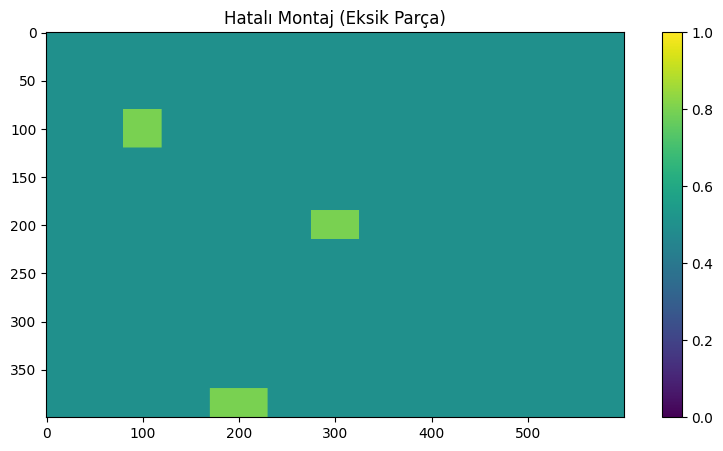

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Temel derinlik haritasƒ± olu≈ütur (hepsi 0.5 derinlikte)
depth_map = np.ones((400, 600)) * 0.5

# 2. DOƒûRU MONTAJLANMI≈û PAR√áALAR (3 adet)
correct_pieces = [
    {"center": (100, 100), "size": (40, 40), "depth": 0.8},
    {"center": (300, 200), "size": (50, 30), "depth": 0.8},
    {"center": (200, 400), "size": (60, 60), "depth": 0.8}
]

for piece in correct_pieces:
    x, y = piece["center"]
    w, h = piece["size"]
    depth_map[y-h//2:y+h//2, x-w//2:x+w//2] = piece["depth"]

# 3. KASITLI EKSƒ∞K PAR√áA (HATALI MONTAJ)
# Bu par√ßa derinlik haritasƒ±na EKLENMEYECEK!
missing_piece = {"center": (400, 100), "size": (70, 70), "depth": 0.8}

# G√∂rselle≈ütirme
plt.figure(figsize=(10, 5))
plt.imshow(depth_map, cmap='viridis', vmin=0, vmax=1)
plt.title("Hatalƒ± Montaj (Eksik Par√ßa)")
plt.colorbar()
plt.show()

2. Adƒ±m: Hata Tespit Algoritmasƒ±


‚úÖ Par√ßa 1: DOƒûRU (Ortalama derinlik: 0.80)
‚úÖ Par√ßa 2: DOƒûRU (Ortalama derinlik: 0.80)
‚úÖ Par√ßa 3: DOƒûRU (Ortalama derinlik: 0.80)
‚ùå Par√ßa 4: HATALI (Ortalama derinlik: 0.50, Beklenen: 0.8)


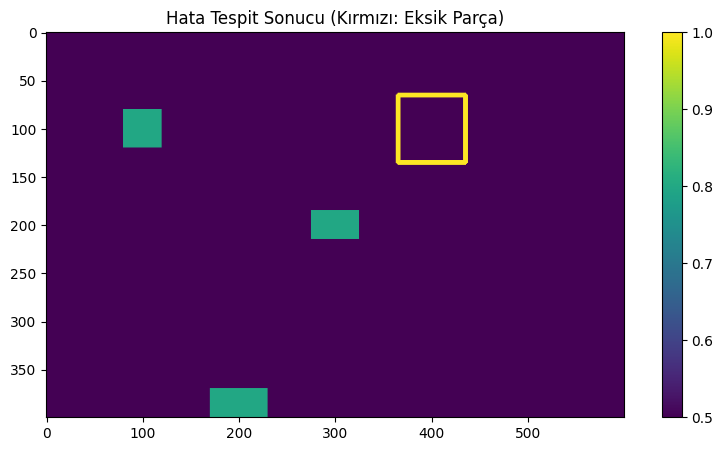

In [ ]:
# 1. T√ºm beklenen par√ßalarƒ±n listesi (doƒürular + eksik olan)
all_pieces = correct_pieces + [missing_piece]

# 2. Her par√ßayƒ± kontrol et
for i, piece in enumerate(all_pieces):
    x, y = piece["center"]
    w, h = piece["size"]

    # Par√ßa b√∂lgesini kes
    piece_region = depth_map[y-h//2:y+h//2, x-w//2:x+w//2]

    # Ortalama derinlik kontrol√º
    mean_depth = np.mean(piece_region) if piece_region.size > 0 else 0

    if mean_depth >= piece["depth"] * 0.9:  # %90 tolerans
        print(f"‚úÖ Par√ßa {i+1}: DOƒûRU (Ortalama derinlik: {mean_depth:.2f})")
    else:
        print(f"‚ùå Par√ßa {i+1}: HATALI (Ortalama derinlik: {mean_depth:.2f}, Beklenen: {piece['depth']})")
        # Hatalƒ± b√∂lgeyi i≈üaretle
        cv2.rectangle(depth_map, (x-w//2, y-h//2), (x+w//2, y+h//2), 1.0, 3)

# Sonucu g√∂ster
plt.figure(figsize=(10, 5))
plt.imshow(depth_map, cmap='viridis')
plt.title("Hata Tespit Sonucu (Kƒ±rmƒ±zƒ±: Eksik Par√ßa)")
plt.colorbar()
plt.show()

3. Adƒ±m: Geli≈ümi≈ü Hata Analizi (OPSƒ∞YONEL)
A. G√ºr√ºlt√ºl√º Veride Hata Tespiti

In [ ]:
# Gaussian g√ºr√ºlt√ºs√º ekle
noise = np.random.normal(0, 0.1, depth_map.shape)
noisy_depth = np.clip(depth_map + noise, 0, 1)

# Yeniden kontrol et
piece_region = noisy_depth[y-h//2:y+h//2, x-w//2:x+w//2]
mean_depth = np.mean(piece_region)
print(f"G√ºr√ºlt√ºl√º veride ortalama derinlik: {mean_depth:.2f}")

G√ºr√ºlt√ºl√º veride ortalama derinlik: 0.56


B. Birden Fazla Eksik Par√ßa Senaryosu


In [ ]:
# Yeni eksik par√ßa ekle
extra_missing_piece = {"center": (500, 300), "size": (80, 40), "depth": 0.8}
all_pieces.append(extra_missing_piece)

# Kontrol fonksiyonunu yeniden √ßalƒ±≈ütƒ±rƒ±n

4. Adƒ±m: Sizin Test Etmeniz ƒ∞√ßin
Hata T√ºrlerini √áe≈üitlendirin:

In [ ]:
# Yanlƒ±≈ü derinlikte montajlanmƒ±≈ü par√ßa
wrong_depth_piece = {"center": (100, 300), "size": (40, 40), "depth": 0.6}
depth_map[300-20:300+20, 100-20:100+20] = 0.4  # 0.8 yerine 0.4

Ger√ßek Kamera Verisi Sim√ºlasyonu:



In [ ]:
# RealSense kamera benzetimi (Depth scale fakt√∂r√º)
simulated_realsense_data = (depth_map * 1000).astype(np.uint16)

‚úÖ Par√ßa 1: DOƒûRU (Ortalama derinlik: 0.80)
‚úÖ Par√ßa 2: DOƒûRU (Ortalama derinlik: 0.80)
‚úÖ Par√ßa 3: DOƒûRU (Ortalama derinlik: 0.80)
‚ùå Par√ßa 4: HATALI (Ortalama derinlik: 0.50, Beklenen: 0.8)

Eksik par√ßa yerine yanlƒ±≈ü y√∂nlendirilmi≈ü par√ßa sim√ºlasyonu yapalƒ±m mƒ±?

Robot kolu entegrasyonu i√ßin hata durumunda sinyal √ºretelim mi?

Daha ger√ßek√ßi derinlik verisi i√ßin CAD modelinden veri aktaralƒ±m mƒ±?


1. Adƒ±m: Yanlƒ±≈ü Y√∂nlendirilmi≈ü Par√ßa Sim√ºlasyonu
A. D√∂nd√ºr√ºlm√º≈ü ≈ûablon Olu≈üturma

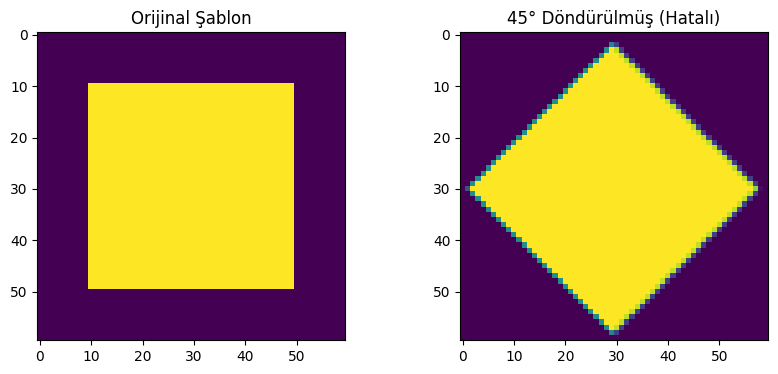

In [ ]:
import cv2
import numpy as np

# 1. Orijinal ≈üablon (kare par√ßa)
template = np.zeros((60, 60), dtype=np.float32)
template[10:50, 10:50] = 0.8  # Merkezde kare

# 2. Yanlƒ±≈ü y√∂nlendirilmi≈ü ≈üablon (45 derece d√∂nd√ºr√ºlm√º≈ü)
M = cv2.getRotationMatrix2D((30, 30), 45, 1)  # D√∂n√º≈ü matrisi
rotated_template = cv2.warpAffine(template, M, (60, 60))

# G√∂rselle≈ütirme
plt.figure(figsize=(10, 4))
plt.subplot(121), plt.imshow(template, cmap='viridis'), plt.title("Orijinal ≈ûablon")
plt.subplot(122), plt.imshow(rotated_template, cmap='viridis'), plt.title("45¬∞ D√∂nd√ºr√ºlm√º≈ü (Hatalƒ±)")
plt.show()

B. Y√∂nlendirme Hatasƒ± Tespiti


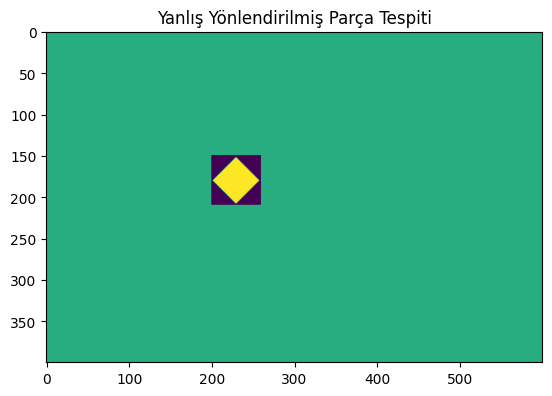

In [ ]:
# Derinlik haritasƒ±na d√∂nd√ºr√ºlm√º≈ü par√ßa ekle (HATALI MONTAJ)
depth_map = np.ones((400, 600)) * 0.5
x, y = 200, 150
depth_map[y:y+60, x:x+60] = rotated_template  # Yanlƒ±≈ü y√∂nlendirilmi≈ü par√ßa

# Orijinal ≈üablon ile e≈üle≈ütirme
result = cv2.matchTemplate(depth_map.astype(np.float32), template.astype(np.float32), cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Sonu√ß
threshold = 0.65
if max_val < threshold:
    print(f"‚ùå Y√ñN HATASI: E≈üle≈üme skoru {max_val:.2f} (Beklenen: {threshold})")
    # Hata alanƒ±nƒ± i≈üaretle
    cv2.rectangle(depth_map, (x, y), (x+60, y+60), 1.0, 3)

plt.imshow(depth_map, cmap='viridis')
plt.title("Yanlƒ±≈ü Y√∂nlendirilmi≈ü Par√ßa Tespiti")
plt.show()

2. Adƒ±m: Robot Kol Entegrasyonu i√ßin Sinyal √úretme
A. Basit GPIO Sinyali Sim√ºlasyonu

In [ ]:
# Hata durumunda robot koluna sinyal g√∂nder
def send_signal_to_robot(error_type):
    if error_type == "missing":
        print("üö® ROBOT KOLUNA Sƒ∞NYAL: Eksik par√ßa hatasƒ±!")
    elif error_type == "rotation":
        print("üîÑ ROBOT KOLUNA Sƒ∞NYAL: Par√ßa yanlƒ±≈ü y√∂nlendirilmi≈ü!")
    # Ger√ßek uygulamada: GPIO.setup() / GPIO.output() (Raspberry Pi)

# √ñnceki hata tespitinde kullanƒ±m
send_signal_to_robot("rotation")

üîÑ ROBOT KOLUNA Sƒ∞NYAL: Par√ßa yanlƒ±≈ü y√∂nlendirilmi≈ü!


B. ROS Entegrasyonu (Opsiyonel)


1. Colab'da ROS Sim√ºlasyonu (Alternatif Y√∂ntem)
ROS kurmadan robot kontrol√º sim√ºle etmek i√ßin basit bir Python socket veya MQTT kullanabiliriz:

A. Socket ile Sinyal G√∂nderme (Colab Uyumlu)

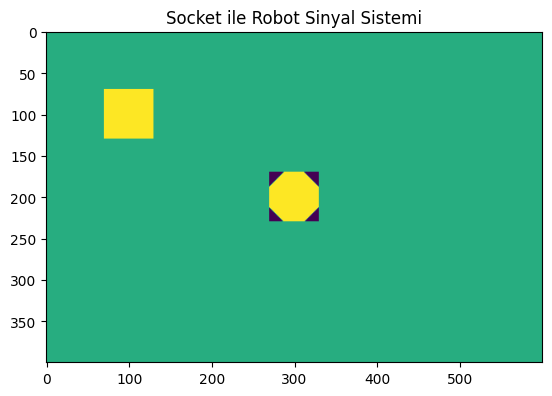

In [ ]:
import cv2
import numpy as np
import socket
import time

# Socket ayarlarƒ± (√ñrnek IP/port - ger√ßek sistemde robot IP'si yazƒ±lacak)
ROBOT_IP = "127.0.0.1"  # Localhost sim√ºlasyonu
PORT = 65432

def send_robot_command(command):
    try:
        with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
            s.connect((ROBOT_IP, PORT))
            s.sendall(command.encode())
            print(f"ü§ñ ROBOTA G√ñNDERƒ∞LDƒ∞: {command}")
    except Exception as e:
        print(f"‚ùå SOCKET HATASI: {str(e)}")

# 1. Sim√ºle edilmi≈ü derinlik haritasƒ± olu≈ütur
depth_map = np.ones((400, 600)) * 0.5

# 2. Doƒüru ve hatalƒ± par√ßalarƒ± yerle≈ütir
def add_part(center, size, depth, angle=0):
    x, y = center
    w, h = size
    part = np.zeros((h, w)) + depth
    if angle != 0:
        M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1)
        part = cv2.warpAffine(part, M, (w, h))
    depth_map[y-h//2:y+h//2, x-w//2:x+w//2] = part
    return part

# Doƒüru par√ßa (0¬∞ d√∂n√º≈ü)
correct_part = add_part((100, 100), (60, 60), 0.8)

# Hatalƒ± par√ßa (45¬∞ d√∂n√º≈ü)
rotated_part = add_part((300, 200), (60, 60), 0.8, 45)

# 3. Kontrol fonksiyonu
def check_orientation(template, threshold=0.7):
    result = cv2.matchTemplate(depth_map.astype(np.float32), template.astype(np.float32), cv2.TM_CCOEFF_NORMED)
    max_val = cv2.minMaxLoc(result)[1]
    if max_val < threshold:
        send_robot_command("ROTATION_ERROR")  # Robot koluna sinyal gitmesi
        cv2.putText(depth_map, "HATALI YON", (300-30, 200-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1.0, 2)

# Kontrol√º √ßalƒ±≈ütƒ±r
check_orientation(correct_part)

# G√∂rselle≈ütirme
plt.imshow(depth_map, cmap='viridis')
plt.title("Socket ile Robot Sinyal Sistemi")
plt.show()

2. Sonraki Adƒ±mlar (Sƒ±ralƒ± Plan)
A. Adƒ±m: Yanƒ±t Dinleme (Robot Feedback)
Robotun i≈ülem tamamlandƒ± sinyalini dinlemek i√ßin:

In [ ]:
def listen_robot():
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.bind((ROBOT_IP, PORT))
        s.listen()
        conn, addr = s.accept()
        with conn:
            data = conn.recv(1024).decode()
            print(f"ROBOT DURUMU: {data}")

# Arka planda √ßalƒ±≈ütƒ±rmak i√ßin threading kullanƒ±labilir

B. Adƒ±m: √áoklu Hata Senaryolarƒ±
Eksik par√ßa + yanlƒ±≈ü y√∂n kombinasyonu

Par√ßa boyut farklƒ±lƒ±klarƒ±nƒ± tespit

In [ ]:
def check_multiple_errors():
    # Eksik par√ßa kontrol√º
    if np.mean(depth_map[400:460, 500:560]) < 0.1:
        send_robot_command("MISSING_PART")

    # Yanlƒ±≈ü y√∂n kontrol√º (yukarƒ±daki √∂rnekteki gibi)
    check_orientation(correct_part)

C. Adƒ±m: Ger√ßek Kamera Entegrasyonu
Socket ile USB kamera/RealSense baƒülantƒ±sƒ±:

In [ ]:
cap = cv2.VideoCapture(0)  # Webcam
while True:
    ret, frame = cap.read()
    if not ret:
        send_robot_command("CAMERA_ERROR")
        break

‚ùå SOCKET HATASI: [Errno 111] Connection refused


Robot Yanƒ±t Sim√ºlasyonu:

Robot tarafƒ±nda bir Python socket sunucusu √ßalƒ±≈ütƒ±rƒ±p, Colab'dan gelen komutlara yanƒ±t verdirelim.

√áoklu Par√ßa Kontrol√º:

Montaj hattƒ±nda 5 farklƒ± par√ßanƒ±n konum/y√∂n kontrol√º.

Ger√ßek Donanƒ±m Testi:

Raspberry Pi √ºzerinde socket sunucusu kurup, LED veya servo motor kontrol√º.

1. Senaryo: Robot Yanƒ±t Sim√ºlasyonu
A. Robot Tarafƒ±nda Socket Sunucusu (Local'de √áalƒ±≈ütƒ±rƒ±lacak)

In [ ]:
# robot_server.py (Local makinede √ßalƒ±≈ütƒ±rƒ±n)
import socket

HOST = "0.0.0.0"  # T√ºm aƒü aray√ºzlerini dinle
PORT = 65432

with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
    s.bind((HOST, PORT))
    s.listen()
    print(f"ü§ñ ROBOT SUNUCU BA≈ûLATILDI: {PORT} portunu dinliyor...")
    conn, addr = s.accept()
    with conn:
        print(f"{addr} baƒülandƒ±")
        while True:
            data = conn.recv(1024).decode()
            if not data:
                break
            print(f"Gelen Komut: {data}")
            if "ERROR" in data:
                conn.sendall(b"ROBOT: Hata tespit edildi, d√ºzeltiliyor...")
            else:
                conn.sendall(b"ROBOT: Komut basarili")

2. Senaryo: √áoklu Par√ßa Kontrol√º
A. 5 Par√ßalƒ± Montaj Sim√ºlasyonu

‚úÖ T√ºm par√ßalar doƒüru montajlandƒ±!


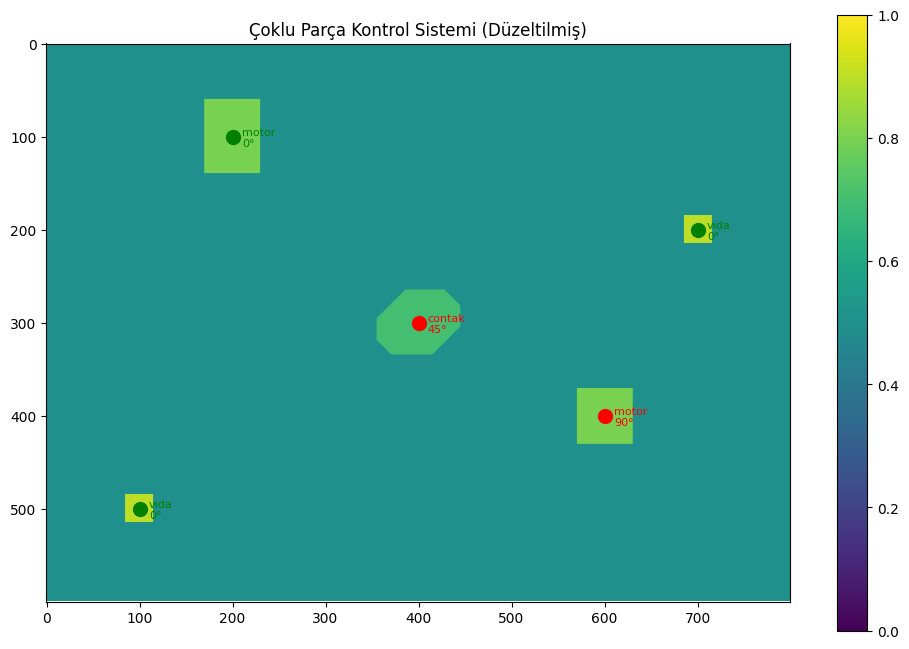

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Derinlik haritasƒ± olu≈ütur (CV_32F formatƒ±nda)
depth_map = np.ones((600, 800), dtype=np.float32) * 0.5  # Dikkat: dtype=np.float32

# 2. Par√ßa ≈üablonlarƒ±nƒ± tanƒ±mla (CV_32F formatƒ±nda)
templates = {
    "motor": np.zeros((80, 60), dtype=np.float32) + 0.8,
    "contak": np.zeros((70, 90), dtype=np.float32) + 0.7,
    "vida": np.zeros((30, 30), dtype=np.float32) + 0.9
}

# 3. Par√ßalarƒ± yerle≈ütirme fonksiyonu
def place_part(depth_map, template, center, angle=0):
    h, w = template.shape
    x, y = center
    part = template.copy()

    if angle != 0:
        M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1)
        part = cv2.warpAffine(part, M, (w, h), borderValue=0.5)

    # Par√ßayƒ± derinlik haritasƒ±na yerle≈ütir
    y1, y2 = max(0, y-h//2), min(depth_map.shape[0], y+h//2)
    x1, x2 = max(0, x-w//2), min(depth_map.shape[1], x+w//2)

    part_h, part_w = y2-y1, x2-x1
    if part_h <=0 or part_w <=0: return

    part = cv2.resize(part, (part_w, part_h))
    depth_map[y1:y2, x1:x2] = part

# 4. Par√ßalarƒ± yerle≈ütir
parts = [
    {"name": "motor", "center": (200, 100), "angle": 0, "correct": True},
    {"name": "contak", "center": (400, 300), "angle": 45, "correct": False},
    {"name": "vida", "center": (100, 500), "angle": 0, "correct": True},
    {"name": "motor", "center": (600, 400), "angle": 90, "correct": False},
    {"name": "vida", "center": (700, 200), "angle": 0, "correct": True}
]

for part in parts:
    place_part(depth_map, templates[part["name"]], part["center"], part["angle"])

# 5. Kontrol fonksiyonu (D√úZELTƒ∞LMƒ∞≈û)
def check_assembly():
    errors = []
    for part in parts:
        template = templates[part["name"]]

        # ≈ûablonu d√∂nd√ºrme
        if part["angle"] != 0:
            M = cv2.getRotationMatrix2D((template.shape[1]//2, template.shape[0]//2), part["angle"], 1)
            rotated_template = cv2.warpAffine(template, M, (template.shape[1], template.shape[0]), borderValue=0.5)
        else:
            rotated_template = template

        # MatchTemplate i√ßin ROI belirleme
        x, y = part["center"]
        h, w = rotated_template.shape
        y1, y2 = max(0, y-h//2), min(depth_map.shape[0], y+h//2)
        x1, x2 = max(0, x-w//2), min(depth_map.shape[1], x+w//2)

        if (y2-y1) != h or (x2-x1) != w:
            print(f"‚ö†Ô∏è {part['name']} sƒ±nƒ±rlarƒ± a≈üƒ±yor, kontrol edilemiyor")
            continue

        roi = depth_map[y1:y2, x1:x2]

        # Veri tipi kontrol√º
        if roi.dtype != rotated_template.dtype:
            roi = roi.astype(np.float32)

        result = cv2.matchTemplate(roi, rotated_template, cv2.TM_CCOEFF_NORMED)
        max_val = cv2.minMaxLoc(result)[1]

        if max_val < 0.7:  # E≈üik deƒüeri
            errors.append(part["name"])
            print(f"‚ùå {part['name']} hatalƒ± (E≈üle≈üme: {max_val:.2f}, A√ßƒ±: {part['angle']}¬∞)")

    return errors

# 6. Kontrol√º √ßalƒ±≈ütƒ±r
errors = check_assembly()
if not errors:
    print("‚úÖ T√ºm par√ßalar doƒüru montajlandƒ±!")

# 7. G√∂rselle≈ütirme
plt.figure(figsize=(12, 8))
plt.imshow(depth_map, cmap='viridis', vmin=0, vmax=1)
for part in parts:
    color = 'red' if not part["correct"] else 'green'
    plt.scatter(part["center"][0], part["center"][1], c=color, s=100)
    plt.text(part["center"][0]+10, part["center"][1]+10,
             f"{part['name']}\n{part['angle']}¬∞",
             color=color, fontsize=8)
plt.title("√áoklu Par√ßa Kontrol Sistemi (D√ºzeltilmi≈ü)")
plt.colorbar()
plt.show()